https://adaresearch.wordpress.com/2024/08/07/vpint2_cloud_removal/

In [ ]:
## mount bucket
!gcsfuse vpint_demo /home/walter_littor_al/vpint-data

{"timestamp":{"seconds":1756224580,"nanos":245696515},"severity":"INFO","message":"Start gcsfuse/3.1.0 (Go version go1.24.0) for app \"\" using mount point: /home/walter_littor_al/vpint\n"}
{"timestamp":{"seconds":1756224580,"nanos":245736719},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"DisableAutoconfig":false,"EnableAtomicRenameObject":true,"EnableGoogleLibAuth":false,"EnableHns":true,"EnableNewReader":false,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":200,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"ExperimentalExcludeRegex":"","ExperimentalParallelDownloadsDefaultOn":true,"MaxParallelDownloads":16,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"ExperimentalEnableDentryCache":false,"ExperimentalEnableReaddirplus":false,"FileMode":

In [ ]:
!fusermount -u /home/walter_littor_al/vpint-data

In [14]:
import sys
import os

# Add the parent VPint directory to the path so Python can find the package
sys.path.append('/home/walter_littor_al/VPint')

# Now import from the VPint package
from VPint.VPint2 import VPint2_interpolator
from VPint.utils.EO_utils import load_product, load_product_windowed, normalise_and_visualise, normalise_and_visualise_single

target_path = "/home/walter_littor_al/vpint-data/TB_S2B_MSIL2A_20250729T051649_N0511_R062_T43NCA_20250729T085641.SAFE.zip"#"/mnt/c/Users/laure/Downloads/S2A_MSIL2A_20240718T105031_N0510_R051_T31UFT_20240718T144450.SAFE.zip"
features_path = "/home/walter_littor_al/vpint-data/FT_S2C_MSIL1C_20250823T051711_N0511_R062_T43NCA_20250823T085630.SAFE.zip"#/mnt/c/Users/laure/Downloads/S2A_MSIL2A_20240110T105421_N0510_R051_T31UFT_20240110T151449.SAFE.zip"


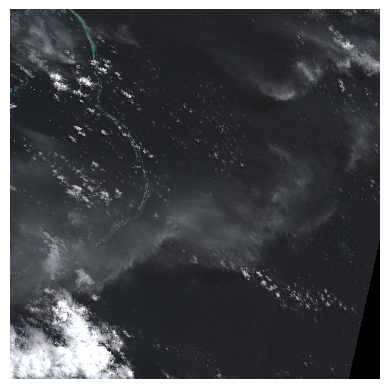

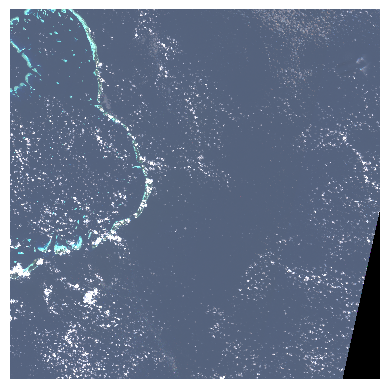

In [15]:
target = load_product(target_path)
features = load_product(features_path)

normalise_and_visualise(target)
normalise_and_visualise(features)

✅ Extracting 256x256 window at position (50, 50)


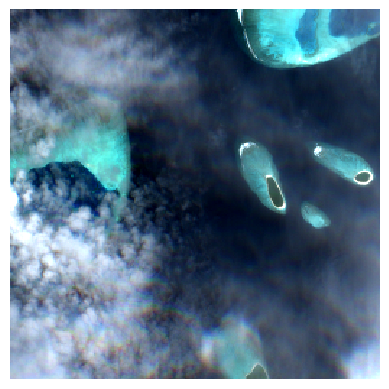

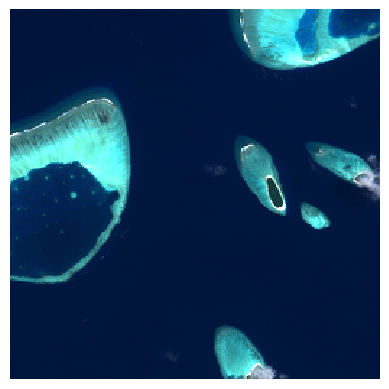

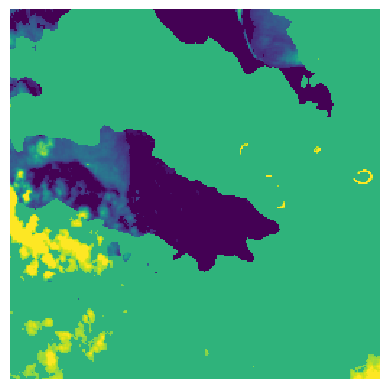

In [16]:
# Test with larger offset values to confirm the fix works
# Window parameters for extracting a patch from the satellite image
y_size = 256    # Height of the window (pixels)
x_size = 256    # Width of the window (pixels)

# Window position (top-left corner coordinates) - using the original problematic values
y_offset = 50   # Vertical position from top edge
x_offset = 50   # Horizontal position from left edge

print(f"✅ Extracting {y_size}x{x_size} window at position ({x_offset}, {y_offset})")

# Perform the windowed data loading
target = load_product_windowed(target_path, y_size, x_size, y_offset, x_offset)
features = load_product_windowed(features_path, y_size, x_size, y_offset, x_offset)

# Also load a cloud mask included in the data product
mask = load_product_windowed(target_path, y_size, x_size, y_offset, x_offset, keep_bands=["CLD"], bands_20m={"CLD":0})[:,:,0]

# Visualise
normalise_and_visualise(target)
normalise_and_visualise(features)
normalise_and_visualise_single(mask, percentile_clip=False)

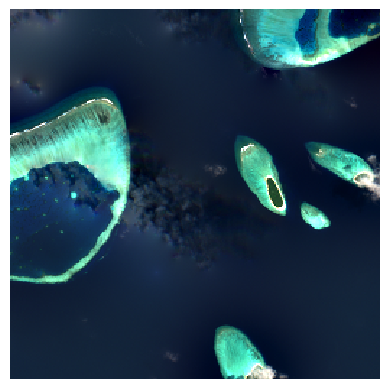

In [17]:
VPint2 = VPint2_interpolator(target, features, mask=mask, bands_first=False, threshold=10) # Set bands_first to True if your data is C x H x W instead of H x W x C
pred = VPint2.run()

normalise_and_visualise(pred)

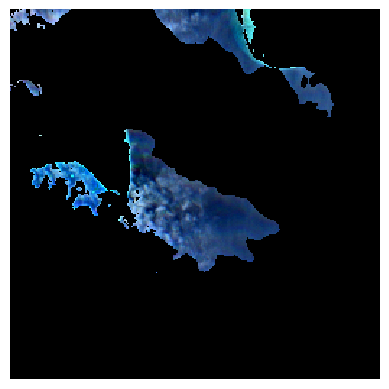

In [21]:
VPint2 = VPint2_interpolator(target, features, mask=mask, bands_first=False, threshold=10)
normalise_and_visualise(VPint2.target)

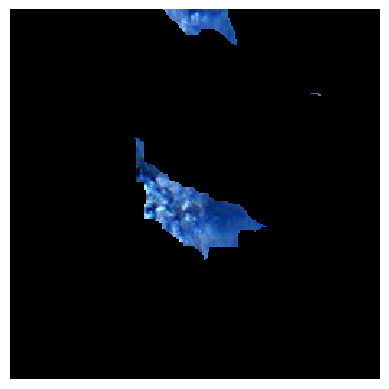

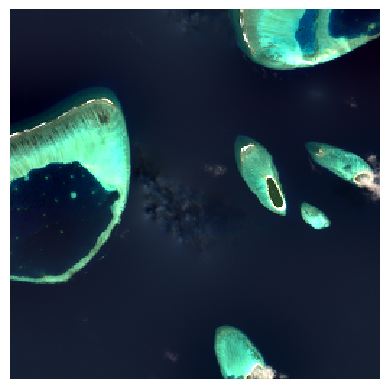

In [22]:
VPint2 = VPint2_interpolator(target, features, mask=mask, buffer_mask=True, mask_buffer_size=5, bands_first=False, threshold=10) 
normalise_and_visualise(VPint2.target) # Visualise the buffered mask
pred = VPint2.run() # Run the algorithm

normalise_and_visualise(pred)

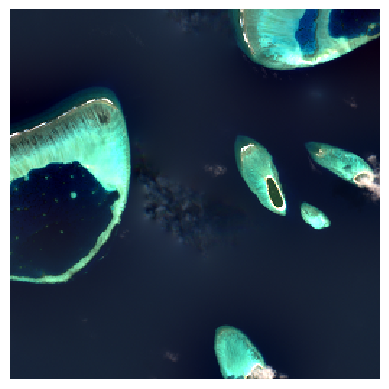

In [23]:
VPint2 = VPint2_interpolator(target, features, mask=mask, buffer_mask=True, mask_buffer_size=5, bands_first=False, threshold=10) 
# Run the algorithm with automatically configured extensions
pred = VPint2.run(resistance=True, prioritise_identity=True, clip_val=10000,
                    auto_adapt=True, auto_adaptation_epochs=10, auto_adaptation_max_iter=100, auto_adaptation_strategy='random', auto_adaptation_proportion=0.8)

normalise_and_visualise(pred)